In [1]:
import torch
torch.ones(10).cuda()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0')

In [2]:
!conda list

# packages in environment at /home/explore/miniconda3/envs/stablebaselines3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_pytorch_select           0.1                       cpu_0  
absl-py                   0.12.0                   pypi_0    pypi
atari-py                  0.2.6                    pypi_0    pypi
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.3.0              pyh44b312d_0    conda-forge
box2d                     2.3.10                   pypi_0    pypi
box2d-py                  2.3.8                    pypi_0    pypi
ca-certificates           2021.1.19      

In [3]:
#export

import gym

from stable_baselines3 import A2C
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

# Save a checkpoint every 1000 steps
checkpoint_callback = CheckpointCallback(save_freq=5000, save_path="./logs/",
                                         name_prefix="rl_model")

# Evaluate the model periodically
# and auto-save the best model and evaluations
# Use a monitor wrapper to properly report episode stats
eval_env = Monitor(gym.make("LunarLander-v2"))
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=2000,
                             deterministic=True, render=False)

# Train an agent using A2C on LunarLander-v2
model = A2C("MlpPolicy", "LunarLander-v2", verbose=1)
model.learn(total_timesteps=20000, callback=[checkpoint_callback, eval_callback])

# Retrieve and reset the environment
env = model.get_env()
obs = env.reset()

# Query the agent (stochastic action here)
action, _ = model.predict(obs, deterministic=False)

Using cuda device
Creating environment from the given name 'LunarLander-v2'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.4     |
|    ep_rew_mean        | -355     |
| time/                 |          |
|    fps                | 333      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.29    |
|    explained_variance | -0.00392 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -6.4     |
|    value_loss         | 51.4     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 92        |
|    ep_rew_mean        | -348      |
| time/                 |           |
|    fps                | 40

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 145      |
|    ep_rew_mean        | -356     |
| time/                 |          |
|    fps                | 304      |
|    iterations         | 1300     |
|    time_elapsed       | 21       |
|    total_timesteps    | 6500     |
| train/                |          |
|    entropy_loss       | -0.759   |
|    explained_variance | -0.179   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1299     |
|    policy_loss        | 13.2     |
|    value_loss         | 292      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 147      |
|    ep_rew_mean        | -348     |
| time/                 |          |
|    fps                | 312      |
|    iterations         | 1400     |
|    time_elapsed       | 22       |
|    total_timesteps    | 7000     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 183      |
|    ep_rew_mean        | -277     |
| time/                 |          |
|    fps                | 264      |
|    iterations         | 2500     |
|    time_elapsed       | 47       |
|    total_timesteps    | 12500    |
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0.00562  |
|    learning_rate      | 0.0007   |
|    n_updates          | 2499     |
|    policy_loss        | 0.257    |
|    value_loss         | 22.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 185      |
|    ep_rew_mean        | -273     |
| time/                 |          |
|    fps                | 268      |
|    iterations         | 2600     |
|    time_elapsed       | 48       |
|    total_timesteps    | 13000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 193      |
|    ep_rew_mean        | -239     |
| time/                 |          |
|    fps                | 264      |
|    iterations         | 3700     |
|    time_elapsed       | 69       |
|    total_timesteps    | 18500    |
| train/                |          |
|    entropy_loss       | -0.437   |
|    explained_variance | -0.0282  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3699     |
|    policy_loss        | -0.00583 |
|    value_loss         | 0.00272  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -231     |
| time/                 |          |
|    fps                | 268      |
|    iterations         | 3800     |
|    time_elapsed       | 70       |
|    total_timesteps    | 19000    |
| train/                |          |
|

In [5]:
#generate py from ipynb
#code from Jeremy Howard (fastai v2)
#!python notebook2script.py "00D059_init_and_import.ipynb"
!python notebook2script.py --fnameout="handson.py"  "01 - hands-on.ipynb"

Converted 01 - hands-on.ipynb to exp/handson.py


# Pendulum

In [6]:
import gym
from stable_baselines3 import SAC
# Train an agent using Soft Actor-Critic on Pendulum-v0
env = gym.make("Pendulum-v0")
model = SAC("MlpPolicy", env, verbose=1)
# Train the model
model.learn(total_timesteps=20000)
# Save the model
model.save("sac_pendulum")
# Load the trained model
model = SAC.load("sac_pendulum")
# Start a new episode
obs = env.reset()
# What action to take in state `obs`?
action, _ = model.predict(obs, deterministic=True)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.45e+03 |
| time/                 |           |
|    episodes           | 4         |
|    fps                | 114       |
|    time_elapsed       | 6         |
|    total timesteps    | 800       |
| train/                |           |
|    actor_loss         | 22.6      |
|    critic_loss        | 2.72      |
|    ent_coef           | 0.812     |
|    ent_coef_loss      | -0.342    |
|    entropy_loss       | -0.611    |
|    explained_variance | -2.56     |
|    learning_rate      | 0.0003    |
|    n_updates          | 699       |
|    policy_loss        | 0.558     |
|    value_loss         | 2         |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
| 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -635     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 98       |
|    time_elapsed    | 122      |
|    total timesteps | 12000    |
| train/             |          |
|    actor_loss      | 103      |
|    critic_loss     | 104      |
|    ent_coef        | 0.291    |
|    ent_coef_loss   | -0.232   |
|    learning_rate   | 0.0003   |
|    n_updates       | 11899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -599     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 98       |
|    time_elapsed    | 130      |
|    total timesteps | 12800    |
| train/             |          |
|    actor_loss      | 98.2     |
|    critic_loss     | 5.23     |
|    ent_coef 

# Cartpole with A2C

In [7]:
import gym

from stable_baselines3 import A2C

env = gym.make('CartPole-v1')

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40.8     |
|    ep_rew_mean        | 40.8     |
| time/                 |          |
|    fps                | 561      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    actor_loss         | 66.8     |
|    critic_loss        | 9.72     |
|    ent_coef           | 0.182    |
|    ent_coef_loss      | -0.214   |
|    entropy_loss       | -0.633   |
|    explained_variance | -0.77    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.46     |
|    value_loss         | 9.81     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 34.2     |
|    ep_rew_mean 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 41.4     |
|    ep_rew_mean        | 41.4     |
| time/                 |          |
|    fps                | 560      |
|    iterations         | 1400     |
|    time_elapsed       | 12       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.611   |
|    explained_variance | -0.0199  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 0.49     |
|    value_loss         | 2.01     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 44.1     |
|    ep_rew_mean        | 44.1     |
| time/                 |          |
|    fps                | 563      |
|    iterations         | 1500     |
|    time_elapsed       | 13       |
|    total_timesteps    | 7500     |
| train/                |          |
|

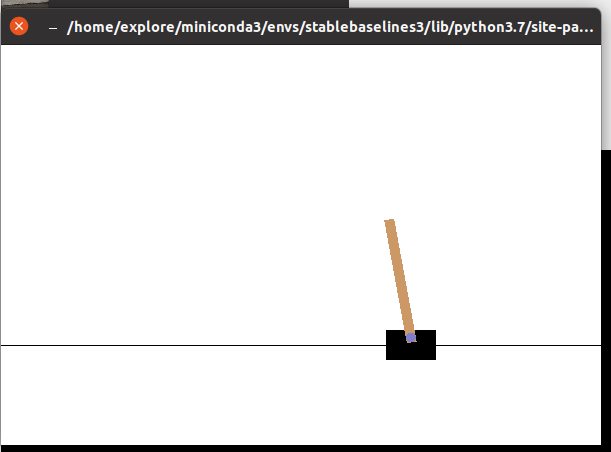

# DQN lunarlander

In [8]:
import gym

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = DQN('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
# Save the agent
model.save("dqn_lunar")
del model  # delete trained model to demonstrate loading

# Load the trained agent
model = DQN.load("dqn_lunar", env=env)

# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

# Enjoy trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 71.8      |
|    ep_rew_mean        | -125      |
|    exploration rate   | 0.986     |
| time/                 |           |
|    episodes           | 4         |
|    fps                | 5617      |
|    time_elapsed       | 0         |
|    total timesteps    | 287       |
| train/                |           |
|    entropy_loss       | -0.548    |
|    explained_variance | -3.37e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2000      |
|    policy_loss        | 0.393     |
|    value_loss         | 0.367     |
-------------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.2     |
|    ep_rew_mean      | -126     |
|    exploration rate | 0.967    |
| time/               |          |
|    episod

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.9     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.608    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 5408     |
|    time_elapsed     | 1        |
|    total timesteps  | 8263     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | -180     |
|    exploration rate | 0.592    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 5414     |
|    time_elapsed     | 1        |
|    total timesteps  | 8598     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | -176     |
|    exploration rate | 0.57     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | -187     |
|    exploration rate | 0.219    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 5373     |
|    time_elapsed     | 3        |
|    total timesteps  | 16434    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.2     |
|    ep_rew_mean      | -182     |
|    exploration rate | 0.203    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 5377     |
|    time_elapsed     | 3        |
|    total timesteps  | 16778    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.9     |
|    ep_rew_mean      | -186     |
|    exploration rate | 0.186    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.2     |
|    ep_rew_mean      | -186     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 5337     |
|    time_elapsed     | 4        |
|    total timesteps  | 24262    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.7     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 5332     |
|    time_elapsed     | 4        |
|    total timesteps  | 24650    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.7     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.7     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 5344     |
|    time_elapsed     | 6        |
|    total timesteps  | 32482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.4     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 5347     |
|    time_elapsed     | 6        |
|    total timesteps  | 32813    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.5     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.4     |
|    ep_rew_mean      | -182     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 5352     |
|    time_elapsed     | 7        |
|    total timesteps  | 40483    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 5352     |
|    time_elapsed     | 7        |
|    total timesteps  | 40908    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92       |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.1     |
|    ep_rew_mean      | -201     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 5348     |
|    time_elapsed     | 9        |
|    total timesteps  | 48786    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | -205     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 5348     |
|    time_elapsed     | 9        |
|    total timesteps  | 49160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94       |
|    ep_rew_mean      | -211     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 407      |
|    ep_rew_mean      | -304     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 1016     |
|    time_elapsed     | 84       |
|    total timesteps  | 86350    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.684    |
|    n_updates        | 9087     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 426      |
|    ep_rew_mean      | -303     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 977      |
|    time_elapsed     | 90       |
|    total timesteps  | 88705    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.931    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 850      |
|    ep_rew_mean      | -143     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 708      |
|    time_elapsed     | 196      |
|    total timesteps  | 139205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.474    |
|    n_updates        | 22301    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 850      |
|    ep_rew_mean      | -142     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 696      |
|    time_elapsed     | 205      |
|    total timesteps  | 143205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.61     |
|    n_updates      

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
# Create environment
env = gym.make('LunarLander-v2')
# Load the trained agent
model = DQN.load("dqn_lunar", env=env)

# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

# Enjoy trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


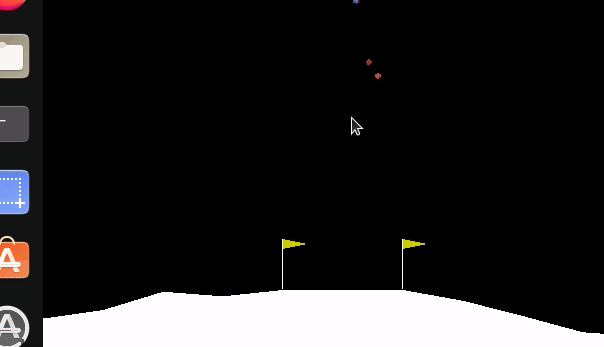

# PPO multiprocessing cartpole

For this one I have created the code in  `cartpole_ppo.py` and run it direcly in python.

In [ ]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environments you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env
    set_random_seed(seed)
    return _init

if __name__ == '__main__':
    env_id = "CartPole-v1"
    num_cpu = 4  # Number of processes to use
    # Create the vectorized environment
    env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

    # Stable Baselines provides you with make_vec_env() helper
    # which does exactly the previous steps for you:
    # env = make_vec_env(env_id, n_envs=num_cpu, seed=0)

    model = PPO('MlpPolicy', env, verbose=1)
    model.learn(total_timesteps=25000)

    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

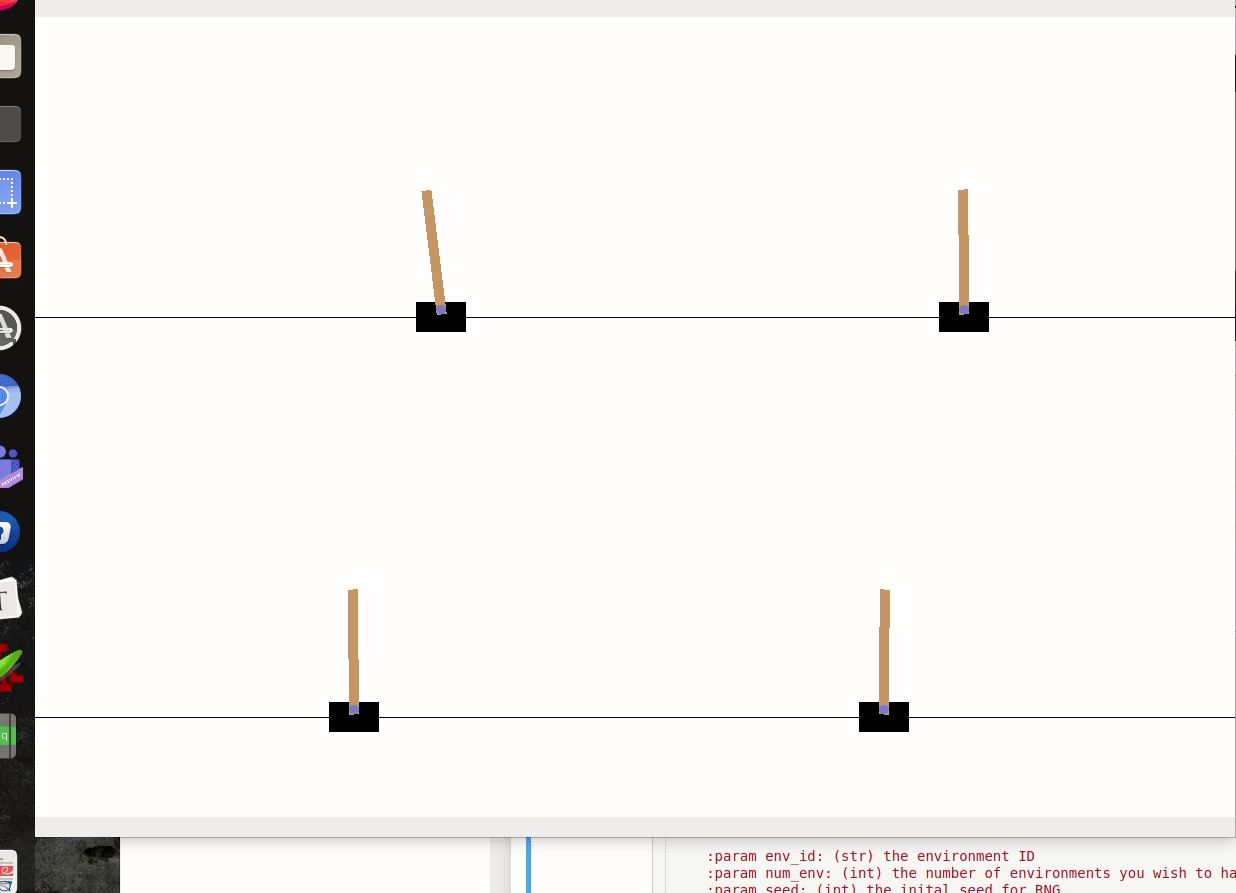

# Monitoring training using callback

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -596.41
Saving new best model to tmp/best_model
Num timesteps: 2000
Best mean reward: -596.41 - Last mean reward per episode: -612.40
Num timesteps: 3000
Best mean reward: -596.41 - Last mean reward per episode: -602.69
Num timesteps: 4000
Best mean reward: -596.41 - Last mean reward per episode: -590.59
Saving new best model to tmp/best_model
Num timesteps: 5000
Best mean reward: -590.59 - Last mean reward per episode: -585.61
Saving new best model to tmp/best_model
Num timesteps: 6000
Best mean reward: -585.61 - Last mean reward per episode: -570.72
Saving new best model to tmp/best_model
Num timesteps: 7000
Best mean reward: -570.72 - Last mean reward per episode: -567.68
Saving new best model to tmp/best_model
Num timesteps: 8000
Best mean reward: -567.68 - Last mean reward per episode: -545.17
Saving new best model to tmp/best_model
Num timesteps: 9000
Best mean reward: -545.17 - Last mean reward per episod

Num timesteps: 92000
Best mean reward: -533.73 - Last mean reward per episode: -555.40
Num timesteps: 93000
Best mean reward: -533.73 - Last mean reward per episode: -557.58
Num timesteps: 94000
Best mean reward: -533.73 - Last mean reward per episode: -553.55
Num timesteps: 95000
Best mean reward: -533.73 - Last mean reward per episode: -551.12
Num timesteps: 96000
Best mean reward: -533.73 - Last mean reward per episode: -549.79
Num timesteps: 97000
Best mean reward: -533.73 - Last mean reward per episode: -554.33
Num timesteps: 98000
Best mean reward: -533.73 - Last mean reward per episode: -544.18
Num timesteps: 99000
Best mean reward: -533.73 - Last mean reward per episode: -560.91
Num timesteps: 100000
Best mean reward: -533.73 - Last mean reward per episode: -571.30


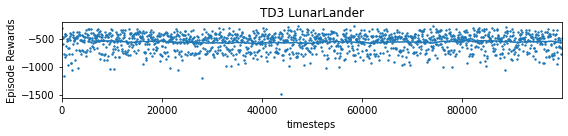

In [1]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import TD3
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback


class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLanderContinuous-v2')
env = Monitor(env, log_dir)

# Add some action noise for exploration
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = TD3('MlpPolicy', env, action_noise=action_noise, verbose=0)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Train the agent
timesteps = 1e5
model.learn(total_timesteps=int(timesteps), callback=callback)

plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "TD3 LunarLander")
plt.show()

# Atari game pong

In [1]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
env = make_atari_env('PongNoFrameskip-v4', n_envs=6, seed=0)
# Frame-stacking with 4 frames
env = VecFrameStack(env, n_stack=4)

model = A2C('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=25000)

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 600      |
|    iterations         | 100      |
|    time_elapsed       | 4        |
|    total_timesteps    | 3000     |
| train/                |          |
|    entropy_loss       | -1.48    |
|    explained_variance | 0.00112  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.016    |
|    value_loss         | 0.0589   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 3.46e+03 |
|    ep_rew_mean        | -20.7    |
| time/                 |          |
|    fps                | 619      |
|    iterations         | 200      |
|    time_elapsed       | 9        |
|    total_timesteps    | 6000     |
| train/                |          |
|    entropy_loss       | -1.79    |
|    explained_v

KeyboardInterrupt: 

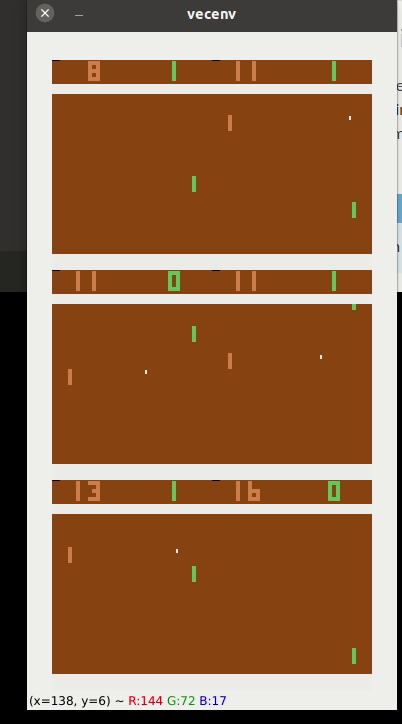

# Atari game breakout

In [1]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
env = make_atari_env('Breakout-v0', n_envs=6, seed=0)
# Frame-stacking with 4 frames
env = VecFrameStack(env, n_stack=4)

model = A2C('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=25000)

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 285      |
|    ep_rew_mean        | 1.64     |
| time/                 |          |
|    fps                | 313      |
|    iterations         | 100      |
|    time_elapsed       | 9        |
|    total_timesteps    | 3000     |
| train/                |          |
|    entropy_loss       | -1.2     |
|    explained_variance | -3.08    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0204  |
|    value_loss         | 0.00748  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 294      |
|    ep_rew_mean        | 1.85     |
| time/                 |          |
|    fps                | 325      |
|    iterations         | 200      |
|    time_elapsed       | 18       |
|    total_times

KeyboardInterrupt: 

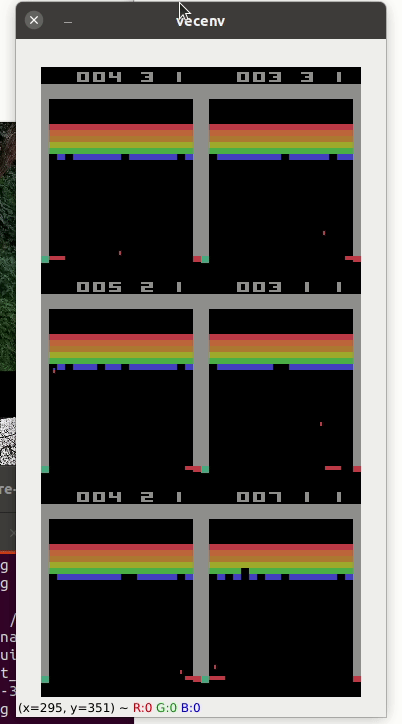

# pybullet

In [5]:
import os
import gym
import pybullet_envs

from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3 import PPO

env = DummyVecEnv([lambda: gym.make("HalfCheetahBulletEnv-v0")])
# Automatically normalize the input features and reward
env = VecNormalize(env, norm_obs=True, norm_reward=True,
                   clip_obs=10.)

model = PPO('MlpPolicy', env)
model.learn(total_timesteps=2000)

# Don't forget to save the VecNormalize statistics when saving the agent
log_dir = "./tmp/"
model.save(log_dir + "ppo_halfcheetah")
stats_path = os.path.join(log_dir, "vec_normalize.pkl")
env.save(stats_path)

# To demonstrate loading
del model, env

# Load the saved statistics
env = DummyVecEnv([lambda: gym.make("HalfCheetahBulletEnv-v0")])
env = VecNormalize.load(stats_path, env)
#  do not update them at test time
env.training = False
# reward normalization is not needed at test time
env.norm_reward = False

# Load the agent
model = PPO.load(log_dir + "ppo_halfcheetah", env=env)

# obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = env.step(action)
#     env.render()

KeyboardInterrupt: 

# Hindsight Experience Replay (HER)

In [2]:
import gym
import highway_env
import numpy as np

from stable_baselines3 import HER, SAC, DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise

env = gym.make("parking-v0")

# Create 4 artificial transitions per real transition
n_sampled_goal = 4

# SAC hyperparams:
model = HER(
    "MlpPolicy",
    env,
    SAC,
    n_sampled_goal=n_sampled_goal,
    goal_selection_strategy="future",
    # IMPORTANT: because the env is not wrapped with a TimeLimit wrapper
    # we have to manually specify the max number of steps per episode
    max_episode_length=100,
    verbose=1,
    buffer_size=int(1e6),
    learning_rate=1e-3,
    gamma=0.95,
    batch_size=256,
    online_sampling=True,
    policy_kwargs=dict(net_arch=[256, 256, 256]),
)

model.learn(int(2e5))
model.save("her_sac_highway")

# Load saved model
# Because it needs access to `env.compute_reward()`
# HER must be loaded with the env
model = HER.load("her_sac_highway", env=env)

obs = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    episode_reward += reward
    if done or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs = env.reset()

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -44.7    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 57       |
|    time_elapsed    | 6        |
|    total timesteps | 400      |
| train/             |          |
|    actor_loss      | -2.5     |
|    critic_loss     | 0.0174   |
|    ent_coef        | 0.742    |
|    ent_coef_loss   | -1       |
|    learning_rate   | 0.001    |
|    n_updates       | 299      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -50.1    |
|    success rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 51       |
|    time_elapsed    | 15       |
|    total timesteps | 800      |
| train/             |        

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 97.4     |
|    ep_rew_mean     | -48.4    |
|    success rate    | 0.0333   |
| time/              |          |
|    episodes        | 60       |
|    fps             | 48       |
|    time_elapsed    | 121      |
|    total timesteps | 5842     |
| train/             |          |
|    actor_loss      | 2.49     |
|    critic_loss     | 0.0201   |
|    ent_coef        | 0.00791  |
|    ent_coef_loss   | -4.29    |
|    learning_rate   | 0.001    |
|    n_updates       | 5741     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 97.5     |
|    ep_rew_mean     | -48      |
|    success rate    | 0.0312   |
| time/              |          |
|    episodes        | 64       |
|    fps             | 48       |
|    time_elapsed    | 129      |
|    total timesteps | 6242     |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.1     |
|    ep_rew_mean     | -40.2    |
|    success rate    | 0.1      |
| time/              |          |
|    episodes        | 116      |
|    fps             | 47       |
|    time_elapsed    | 233      |
|    total timesteps | 11108    |
| train/             |          |
|    actor_loss      | 3.3      |
|    critic_loss     | 0.16     |
|    ent_coef        | 0.00512  |
|    ent_coef_loss   | -0.66    |
|    learning_rate   | 0.001    |
|    n_updates       | 11007    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.5     |
|    ep_rew_mean     | -39.3    |
|    success rate    | 0.11     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 47       |
|    time_elapsed    | 240      |
|    total timesteps | 11450    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.6     |
|    ep_rew_mean     | -26.2    |
|    success rate    | 0.3      |
| time/              |          |
|    episodes        | 172      |
|    fps             | 47       |
|    time_elapsed    | 323      |
|    total timesteps | 15305    |
| train/             |          |
|    actor_loss      | 3.02     |
|    critic_loss     | 0.0258   |
|    ent_coef        | 0.00488  |
|    ent_coef_loss   | -1.08    |
|    learning_rate   | 0.001    |
|    n_updates       | 15204    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82       |
|    ep_rew_mean     | -24.9    |
|    success rate    | 0.31     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 47       |
|    time_elapsed    | 331      |
|    total timesteps | 15637    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 70.3     |
|    ep_rew_mean     | -17.4    |
|    success rate    | 0.48     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 46       |
|    time_elapsed    | 410      |
|    total timesteps | 19154    |
| train/             |          |
|    actor_loss      | 2.57     |
|    critic_loss     | 0.041    |
|    ent_coef        | 0.00453  |
|    ent_coef_loss   | -0.561   |
|    learning_rate   | 0.001    |
|    n_updates       | 19053    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 68.9     |
|    ep_rew_mean     | -17.1    |
|    success rate    | 0.5      |
| time/              |          |
|    episodes        | 232      |
|    fps             | 46       |
|    time_elapsed    | 415      |
|    total timesteps | 19362    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 64.6     |
|    ep_rew_mean     | -15.4    |
|    success rate    | 0.55     |
| time/              |          |
|    episodes        | 284      |
|    fps             | 46       |
|    time_elapsed    | 487      |
|    total timesteps | 22623    |
| train/             |          |
|    actor_loss      | 2.77     |
|    critic_loss     | 0.0104   |
|    ent_coef        | 0.00451  |
|    ent_coef_loss   | -0.466   |
|    learning_rate   | 0.001    |
|    n_updates       | 22522    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 63.6     |
|    ep_rew_mean     | -15.2    |
|    success rate    | 0.57     |
| time/              |          |
|    episodes        | 288      |
|    fps             | 46       |
|    time_elapsed    | 492      |
|    total timesteps | 22842    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 58.2     |
|    ep_rew_mean     | -14.2    |
|    success rate    | 0.6      |
| time/              |          |
|    episodes        | 340      |
|    fps             | 46       |
|    time_elapsed    | 554      |
|    total timesteps | 25673    |
| train/             |          |
|    actor_loss      | 2.4      |
|    critic_loss     | 0.0191   |
|    ent_coef        | 0.00501  |
|    ent_coef_loss   | -1.35    |
|    learning_rate   | 0.001    |
|    n_updates       | 25572    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 57.4     |
|    ep_rew_mean     | -14      |
|    success rate    | 0.61     |
| time/              |          |
|    episodes        | 344      |
|    fps             | 46       |
|    time_elapsed    | 560      |
|    total timesteps | 25917    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.8     |
|    ep_rew_mean     | -12.6    |
|    success rate    | 0.71     |
| time/              |          |
|    episodes        | 396      |
|    fps             | 46       |
|    time_elapsed    | 610      |
|    total timesteps | 28211    |
| train/             |          |
|    actor_loss      | 2.44     |
|    critic_loss     | 0.0789   |
|    ent_coef        | 0.00473  |
|    ent_coef_loss   | 0.0156   |
|    learning_rate   | 0.001    |
|    n_updates       | 28110    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.8     |
|    ep_rew_mean     | -12.4    |
|    success rate    | 0.72     |
| time/              |          |
|    episodes        | 400      |
|    fps             | 46       |
|    time_elapsed    | 613      |
|    total timesteps | 28302    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | -11.3    |
|    success rate    | 0.77     |
| time/              |          |
|    episodes        | 452      |
|    fps             | 46       |
|    time_elapsed    | 665      |
|    total timesteps | 30708    |
| train/             |          |
|    actor_loss      | 2.24     |
|    critic_loss     | 0.0116   |
|    ent_coef        | 0.00498  |
|    ent_coef_loss   | 0.0436   |
|    learning_rate   | 0.001    |
|    n_updates       | 30607    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.5     |
|    ep_rew_mean     | -11.2    |
|    success rate    | 0.77     |
| time/              |          |
|    episodes        | 456      |
|    fps             | 46       |
|    time_elapsed    | 671      |
|    total timesteps | 30956    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.4     |
|    ep_rew_mean     | -10.6    |
|    success rate    | 0.8      |
| time/              |          |
|    episodes        | 508      |
|    fps             | 45       |
|    time_elapsed    | 718      |
|    total timesteps | 32965    |
| train/             |          |
|    actor_loss      | 2.29     |
|    critic_loss     | 0.0164   |
|    ent_coef        | 0.00496  |
|    ent_coef_loss   | -0.444   |
|    learning_rate   | 0.001    |
|    n_updates       | 32864    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.8     |
|    ep_rew_mean     | -10.4    |
|    success rate    | 0.8      |
| time/              |          |
|    episodes        | 512      |
|    fps             | 45       |
|    time_elapsed    | 720      |
|    total timesteps | 33038    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33.4     |
|    ep_rew_mean     | -8.81    |
|    success rate    | 0.9      |
| time/              |          |
|    episodes        | 564      |
|    fps             | 45       |
|    time_elapsed    | 758      |
|    total timesteps | 34618    |
| train/             |          |
|    actor_loss      | 2.22     |
|    critic_loss     | 0.0221   |
|    ent_coef        | 0.0049   |
|    ent_coef_loss   | -0.152   |
|    learning_rate   | 0.001    |
|    n_updates       | 34517    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33.3     |
|    ep_rew_mean     | -8.76    |
|    success rate    | 0.89     |
| time/              |          |
|    episodes        | 568      |
|    fps             | 45       |
|    time_elapsed    | 762      |
|    total timesteps | 34785    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33.1     |
|    ep_rew_mean     | -8.62    |
|    success rate    | 0.91     |
| time/              |          |
|    episodes        | 620      |
|    fps             | 45       |
|    time_elapsed    | 802      |
|    total timesteps | 36530    |
| train/             |          |
|    actor_loss      | 2.4      |
|    critic_loss     | 0.0124   |
|    ent_coef        | 0.00527  |
|    ent_coef_loss   | -0.27    |
|    learning_rate   | 0.001    |
|    n_updates       | 36429    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33.4     |
|    ep_rew_mean     | -8.73    |
|    success rate    | 0.9      |
| time/              |          |
|    episodes        | 624      |
|    fps             | 45       |
|    time_elapsed    | 807      |
|    total timesteps | 36733    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 34       |
|    ep_rew_mean     | -9.2     |
|    success rate    | 0.89     |
| time/              |          |
|    episodes        | 676      |
|    fps             | 45       |
|    time_elapsed    | 849      |
|    total timesteps | 38467    |
| train/             |          |
|    actor_loss      | 2.15     |
|    critic_loss     | 0.0151   |
|    ent_coef        | 0.00529  |
|    ent_coef_loss   | 0.41     |
|    learning_rate   | 0.001    |
|    n_updates       | 38366    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33.4     |
|    ep_rew_mean     | -9.16    |
|    success rate    | 0.9      |
| time/              |          |
|    episodes        | 680      |
|    fps             | 45       |
|    time_elapsed    | 852      |
|    total timesteps | 38571    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 32.4     |
|    ep_rew_mean     | -8.89    |
|    success rate    | 0.89     |
| time/              |          |
|    episodes        | 732      |
|    fps             | 45       |
|    time_elapsed    | 888      |
|    total timesteps | 40138    |
| train/             |          |
|    actor_loss      | 2.06     |
|    critic_loss     | 0.0121   |
|    ent_coef        | 0.00549  |
|    ent_coef_loss   | -1.02    |
|    learning_rate   | 0.001    |
|    n_updates       | 40037    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 31.6     |
|    ep_rew_mean     | -8.72    |
|    success rate    | 0.9      |
| time/              |          |
|    episodes        | 736      |
|    fps             | 45       |
|    time_elapsed    | 891      |
|    total timesteps | 40249    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | -8.53    |
|    success rate    | 0.9      |
| time/              |          |
|    episodes        | 788      |
|    fps             | 45       |
|    time_elapsed    | 927      |
|    total timesteps | 41784    |
| train/             |          |
|    actor_loss      | 2.21     |
|    critic_loss     | 0.0294   |
|    ent_coef        | 0.00569  |
|    ent_coef_loss   | -0.675   |
|    learning_rate   | 0.001    |
|    n_updates       | 41683    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.5     |
|    ep_rew_mean     | -8.49    |
|    success rate    | 0.91     |
| time/              |          |
|    episodes        | 792      |
|    fps             | 45       |
|    time_elapsed    | 930      |
|    total timesteps | 41903    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | -8.16    |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 844      |
|    fps             | 44       |
|    time_elapsed    | 964      |
|    total timesteps | 43347    |
| train/             |          |
|    actor_loss      | 2.2      |
|    critic_loss     | 0.0116   |
|    ent_coef        | 0.00553  |
|    ent_coef_loss   | -0.285   |
|    learning_rate   | 0.001    |
|    n_updates       | 43246    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | -8.13    |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 848      |
|    fps             | 44       |
|    time_elapsed    | 966      |
|    total timesteps | 43447    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.9     |
|    ep_rew_mean     | -8.66    |
|    success rate    | 0.92     |
| time/              |          |
|    episodes        | 900      |
|    fps             | 44       |
|    time_elapsed    | 1004     |
|    total timesteps | 45119    |
| train/             |          |
|    actor_loss      | 2.15     |
|    critic_loss     | 0.0094   |
|    ent_coef        | 0.00535  |
|    ent_coef_loss   | -0.297   |
|    learning_rate   | 0.001    |
|    n_updates       | 45018    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 31.2     |
|    ep_rew_mean     | -8.74    |
|    success rate    | 0.92     |
| time/              |          |
|    episodes        | 904      |
|    fps             | 44       |
|    time_elapsed    | 1007     |
|    total timesteps | 45225    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | -8.42    |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 956      |
|    fps             | 44       |
|    time_elapsed    | 1040     |
|    total timesteps | 46657    |
| train/             |          |
|    actor_loss      | 2.13     |
|    critic_loss     | 0.0281   |
|    ent_coef        | 0.00573  |
|    ent_coef_loss   | -0.242   |
|    learning_rate   | 0.001    |
|    n_updates       | 46556    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.9     |
|    ep_rew_mean     | -8.14    |
|    success rate    | 0.95     |
| time/              |          |
|    episodes        | 960      |
|    fps             | 44       |
|    time_elapsed    | 1042     |
|    total timesteps | 46724    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -8.28    |
|    success rate    | 0.92     |
| time/              |          |
|    episodes        | 1012     |
|    fps             | 44       |
|    time_elapsed    | 1083     |
|    total timesteps | 48450    |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.0171   |
|    ent_coef        | 0.00573  |
|    ent_coef_loss   | 1.35     |
|    learning_rate   | 0.001    |
|    n_updates       | 48349    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.7     |
|    ep_rew_mean     | -8.16    |
|    success rate    | 0.92     |
| time/              |          |
|    episodes        | 1016     |
|    fps             | 44       |
|    time_elapsed    | 1084     |
|    total timesteps | 48511    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.7     |
|    ep_rew_mean     | -8.13    |
|    success rate    | 0.93     |
| time/              |          |
|    episodes        | 1068     |
|    fps             | 44       |
|    time_elapsed    | 1114     |
|    total timesteps | 49755    |
| train/             |          |
|    actor_loss      | 2.25     |
|    critic_loss     | 0.00724  |
|    ent_coef        | 0.00569  |
|    ent_coef_loss   | 0.463    |
|    learning_rate   | 0.001    |
|    n_updates       | 49654    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.6     |
|    ep_rew_mean     | -8.35    |
|    success rate    | 0.92     |
| time/              |          |
|    episodes        | 1072     |
|    fps             | 44       |
|    time_elapsed    | 1118     |
|    total timesteps | 49932    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -7.95    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1124     |
|    fps             | 44       |
|    time_elapsed    | 1151     |
|    total timesteps | 51353    |
| train/             |          |
|    actor_loss      | 2.22     |
|    critic_loss     | 0.00808  |
|    ent_coef        | 0.00544  |
|    ent_coef_loss   | 2.12     |
|    learning_rate   | 0.001    |
|    n_updates       | 51252    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -7.91    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1128     |
|    fps             | 44       |
|    time_elapsed    | 1154     |
|    total timesteps | 51458    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | -8.02    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1180     |
|    fps             | 44       |
|    time_elapsed    | 1186     |
|    total timesteps | 52843    |
| train/             |          |
|    actor_loss      | 2.28     |
|    critic_loss     | 0.00897  |
|    ent_coef        | 0.00556  |
|    ent_coef_loss   | 0.0217   |
|    learning_rate   | 0.001    |
|    n_updates       | 52742    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | -8.02    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1184     |
|    fps             | 44       |
|    time_elapsed    | 1188     |
|    total timesteps | 52928    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | -7.77    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1236     |
|    fps             | 44       |
|    time_elapsed    | 1220     |
|    total timesteps | 54320    |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.0099   |
|    ent_coef        | 0.00609  |
|    ent_coef_loss   | -0.864   |
|    learning_rate   | 0.001    |
|    n_updates       | 54219    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -7.8     |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1240     |
|    fps             | 44       |
|    time_elapsed    | 1222     |
|    total timesteps | 54403    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | -7.68    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1292     |
|    fps             | 44       |
|    time_elapsed    | 1252     |
|    total timesteps | 55710    |
| train/             |          |
|    actor_loss      | 1.97     |
|    critic_loss     | 0.00877  |
|    ent_coef        | 0.00607  |
|    ent_coef_loss   | -0.0996  |
|    learning_rate   | 0.001    |
|    n_updates       | 55609    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | -7.59    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1296     |
|    fps             | 44       |
|    time_elapsed    | 1254     |
|    total timesteps | 55787    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.01    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1348     |
|    fps             | 44       |
|    time_elapsed    | 1282     |
|    total timesteps | 57000    |
| train/             |          |
|    actor_loss      | 2        |
|    critic_loss     | 0.0105   |
|    ent_coef        | 0.00605  |
|    ent_coef_loss   | -0.774   |
|    learning_rate   | 0.001    |
|    n_updates       | 56899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.02    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1352     |
|    fps             | 44       |
|    time_elapsed    | 1284     |
|    total timesteps | 57083    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -7.53    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1404     |
|    fps             | 44       |
|    time_elapsed    | 1318     |
|    total timesteps | 58565    |
| train/             |          |
|    actor_loss      | 1.88     |
|    critic_loss     | 0.00722  |
|    ent_coef        | 0.00595  |
|    ent_coef_loss   | -0.445   |
|    learning_rate   | 0.001    |
|    n_updates       | 58464    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -7.51    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1408     |
|    fps             | 44       |
|    time_elapsed    | 1320     |
|    total timesteps | 58677    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | -7.83    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1460     |
|    fps             | 44       |
|    time_elapsed    | 1350     |
|    total timesteps | 59968    |
| train/             |          |
|    actor_loss      | 2        |
|    critic_loss     | 0.00834  |
|    ent_coef        | 0.00586  |
|    ent_coef_loss   | -0.971   |
|    learning_rate   | 0.001    |
|    n_updates       | 59867    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -7.82    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 1464     |
|    fps             | 44       |
|    time_elapsed    | 1352     |
|    total timesteps | 60047    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -7.46    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 1516     |
|    fps             | 44       |
|    time_elapsed    | 1379     |
|    total timesteps | 61188    |
| train/             |          |
|    actor_loss      | 1.79     |
|    critic_loss     | 0.00504  |
|    ent_coef        | 0.00648  |
|    ent_coef_loss   | 0.523    |
|    learning_rate   | 0.001    |
|    n_updates       | 61087    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.34    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 1520     |
|    fps             | 44       |
|    time_elapsed    | 1381     |
|    total timesteps | 61277    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -7       |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 1572     |
|    fps             | 44       |
|    time_elapsed    | 1407     |
|    total timesteps | 62357    |
| train/             |          |
|    actor_loss      | 1.98     |
|    critic_loss     | 0.00784  |
|    ent_coef        | 0.00666  |
|    ent_coef_loss   | -0.622   |
|    learning_rate   | 0.001    |
|    n_updates       | 62256    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | -6.82    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 1576     |
|    fps             | 44       |
|    time_elapsed    | 1408     |
|    total timesteps | 62425    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -7.16    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1628     |
|    fps             | 44       |
|    time_elapsed    | 1441     |
|    total timesteps | 63784    |
| train/             |          |
|    actor_loss      | 1.93     |
|    critic_loss     | 0.00816  |
|    ent_coef        | 0.00628  |
|    ent_coef_loss   | 0.243    |
|    learning_rate   | 0.001    |
|    n_updates       | 63683    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -7.21    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1632     |
|    fps             | 44       |
|    time_elapsed    | 1443     |
|    total timesteps | 63871    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | -7.55    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1684     |
|    fps             | 44       |
|    time_elapsed    | 1474     |
|    total timesteps | 65203    |
| train/             |          |
|    actor_loss      | 1.87     |
|    critic_loss     | 0.00573  |
|    ent_coef        | 0.0063   |
|    ent_coef_loss   | 0.61     |
|    learning_rate   | 0.001    |
|    n_updates       | 65102    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.7     |
|    ep_rew_mean     | -7.57    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1688     |
|    fps             | 44       |
|    time_elapsed    | 1476     |
|    total timesteps | 65290    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.2     |
|    ep_rew_mean     | -8.36    |
|    success rate    | 0.95     |
| time/              |          |
|    episodes        | 1740     |
|    fps             | 43       |
|    time_elapsed    | 1520     |
|    total timesteps | 66889    |
| train/             |          |
|    actor_loss      | 1.86     |
|    critic_loss     | 0.0056   |
|    ent_coef        | 0.0065   |
|    ent_coef_loss   | -0.149   |
|    learning_rate   | 0.001    |
|    n_updates       | 66788    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | -8.5     |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 1744     |
|    fps             | 43       |
|    time_elapsed    | 1524     |
|    total timesteps | 67050    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | -7.88    |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 1796     |
|    fps             | 43       |
|    time_elapsed    | 1553     |
|    total timesteps | 68177    |
| train/             |          |
|    actor_loss      | 1.83     |
|    critic_loss     | 0.0141   |
|    ent_coef        | 0.00648  |
|    ent_coef_loss   | -0.365   |
|    learning_rate   | 0.001    |
|    n_updates       | 68076    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | -7.83    |
|    success rate    | 0.94     |
| time/              |          |
|    episodes        | 1800     |
|    fps             | 43       |
|    time_elapsed    | 1555     |
|    total timesteps | 68258    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.24    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1852     |
|    fps             | 43       |
|    time_elapsed    | 1590     |
|    total timesteps | 69518    |
| train/             |          |
|    actor_loss      | 1.71     |
|    critic_loss     | 0.00682  |
|    ent_coef        | 0.00669  |
|    ent_coef_loss   | -0.209   |
|    learning_rate   | 0.001    |
|    n_updates       | 69417    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.27    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1856     |
|    fps             | 43       |
|    time_elapsed    | 1592     |
|    total timesteps | 69602    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | -7.4     |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1908     |
|    fps             | 43       |
|    time_elapsed    | 1623     |
|    total timesteps | 70936    |
| train/             |          |
|    actor_loss      | 1.77     |
|    critic_loss     | 0.0126   |
|    ent_coef        | 0.00641  |
|    ent_coef_loss   | 1.15     |
|    learning_rate   | 0.001    |
|    n_updates       | 70835    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | -7.41    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 1912     |
|    fps             | 43       |
|    time_elapsed    | 1625     |
|    total timesteps | 71032    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.7     |
|    ep_rew_mean     | -7.48    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 1964     |
|    fps             | 43       |
|    time_elapsed    | 1653     |
|    total timesteps | 72231    |
| train/             |          |
|    actor_loss      | 1.7      |
|    critic_loss     | 0.00917  |
|    ent_coef        | 0.00666  |
|    ent_coef_loss   | -0.0405  |
|    learning_rate   | 0.001    |
|    n_updates       | 72130    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.36    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 1968     |
|    fps             | 43       |
|    time_elapsed    | 1655     |
|    total timesteps | 72333    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.29    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2020     |
|    fps             | 43       |
|    time_elapsed    | 1682     |
|    total timesteps | 73512    |
| train/             |          |
|    actor_loss      | 1.89     |
|    critic_loss     | 0.0068   |
|    ent_coef        | 0.00673  |
|    ent_coef_loss   | -0.177   |
|    learning_rate   | 0.001    |
|    n_updates       | 73411    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.28    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2024     |
|    fps             | 43       |
|    time_elapsed    | 1684     |
|    total timesteps | 73602    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.16    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2076     |
|    fps             | 43       |
|    time_elapsed    | 1711     |
|    total timesteps | 74799    |
| train/             |          |
|    actor_loss      | 1.78     |
|    critic_loss     | 0.00677  |
|    ent_coef        | 0.00665  |
|    ent_coef_loss   | 0.917    |
|    learning_rate   | 0.001    |
|    n_updates       | 74698    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -7.4     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2080     |
|    fps             | 43       |
|    time_elapsed    | 1714     |
|    total timesteps | 74946    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | -7.56    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 2132     |
|    fps             | 43       |
|    time_elapsed    | 1747     |
|    total timesteps | 76364    |
| train/             |          |
|    actor_loss      | 1.59     |
|    critic_loss     | 0.00871  |
|    ent_coef        | 0.00732  |
|    ent_coef_loss   | 0.417    |
|    learning_rate   | 0.001    |
|    n_updates       | 76263    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | -7.59    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 2136     |
|    fps             | 43       |
|    time_elapsed    | 1749     |
|    total timesteps | 76458    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.6     |
|    ep_rew_mean     | -7.67    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 2188     |
|    fps             | 43       |
|    time_elapsed    | 1781     |
|    total timesteps | 77702    |
| train/             |          |
|    actor_loss      | 1.56     |
|    critic_loss     | 0.0289   |
|    ent_coef        | 0.00722  |
|    ent_coef_loss   | -0.897   |
|    learning_rate   | 0.001    |
|    n_updates       | 77601    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -7.81    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 2192     |
|    fps             | 43       |
|    time_elapsed    | 1783     |
|    total timesteps | 77814    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -7.82    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2244     |
|    fps             | 43       |
|    time_elapsed    | 1813     |
|    total timesteps | 79072    |
| train/             |          |
|    actor_loss      | 1.65     |
|    critic_loss     | 0.00967  |
|    ent_coef        | 0.00654  |
|    ent_coef_loss   | 0.0899   |
|    learning_rate   | 0.001    |
|    n_updates       | 78971    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -7.9     |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 2248     |
|    fps             | 43       |
|    time_elapsed    | 1816     |
|    total timesteps | 79231    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -7.75    |
|    success rate    | 0.95     |
| time/              |          |
|    episodes        | 2300     |
|    fps             | 43       |
|    time_elapsed    | 1846     |
|    total timesteps | 80535    |
| train/             |          |
|    actor_loss      | 1.75     |
|    critic_loss     | 0.00801  |
|    ent_coef        | 0.00657  |
|    ent_coef_loss   | -1.21    |
|    learning_rate   | 0.001    |
|    n_updates       | 80434    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -7.72    |
|    success rate    | 0.95     |
| time/              |          |
|    episodes        | 2304     |
|    fps             | 43       |
|    time_elapsed    | 1848     |
|    total timesteps | 80612    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.34    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 2356     |
|    fps             | 43       |
|    time_elapsed    | 1874     |
|    total timesteps | 81716    |
| train/             |          |
|    actor_loss      | 1.74     |
|    critic_loss     | 0.0059   |
|    ent_coef        | 0.00649  |
|    ent_coef_loss   | -0.606   |
|    learning_rate   | 0.001    |
|    n_updates       | 81615    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.2     |
|    ep_rew_mean     | -7.49    |
|    success rate    | 0.95     |
| time/              |          |
|    episodes        | 2360     |
|    fps             | 43       |
|    time_elapsed    | 1878     |
|    total timesteps | 81885    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -6.99    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 2412     |
|    fps             | 43       |
|    time_elapsed    | 1903     |
|    total timesteps | 83017    |
| train/             |          |
|    actor_loss      | 1.95     |
|    critic_loss     | 0.00944  |
|    ent_coef        | 0.00664  |
|    ent_coef_loss   | -0.148   |
|    learning_rate   | 0.001    |
|    n_updates       | 82916    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -6.98    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 2416     |
|    fps             | 43       |
|    time_elapsed    | 1905     |
|    total timesteps | 83096    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -6.89    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2468     |
|    fps             | 43       |
|    time_elapsed    | 1932     |
|    total timesteps | 84307    |
| train/             |          |
|    actor_loss      | 1.95     |
|    critic_loss     | 0.00853  |
|    ent_coef        | 0.00691  |
|    ent_coef_loss   | -0.0748  |
|    learning_rate   | 0.001    |
|    n_updates       | 84206    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.11    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2472     |
|    fps             | 43       |
|    time_elapsed    | 1936     |
|    total timesteps | 84466    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.42    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2524     |
|    fps             | 43       |
|    time_elapsed    | 1962     |
|    total timesteps | 85599    |
| train/             |          |
|    actor_loss      | 1.73     |
|    critic_loss     | 0.00597  |
|    ent_coef        | 0.00677  |
|    ent_coef_loss   | 0.0972   |
|    learning_rate   | 0.001    |
|    n_updates       | 85498    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.39    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2528     |
|    fps             | 43       |
|    time_elapsed    | 1963     |
|    total timesteps | 85676    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -7.29    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2580     |
|    fps             | 43       |
|    time_elapsed    | 1991     |
|    total timesteps | 86891    |
| train/             |          |
|    actor_loss      | 1.83     |
|    critic_loss     | 0.0256   |
|    ent_coef        | 0.0069   |
|    ent_coef_loss   | 0.464    |
|    learning_rate   | 0.001    |
|    n_updates       | 86790    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.2     |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2584     |
|    fps             | 43       |
|    time_elapsed    | 1993     |
|    total timesteps | 86968    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.43    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2636     |
|    fps             | 43       |
|    time_elapsed    | 2023     |
|    total timesteps | 88229    |
| train/             |          |
|    actor_loss      | 1.65     |
|    critic_loss     | 0.00503  |
|    ent_coef        | 0.00718  |
|    ent_coef_loss   | 0.725    |
|    learning_rate   | 0.001    |
|    n_updates       | 88128    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.33    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2640     |
|    fps             | 43       |
|    time_elapsed    | 2026     |
|    total timesteps | 88338    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -7.48    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2692     |
|    fps             | 43       |
|    time_elapsed    | 2053     |
|    total timesteps | 89486    |
| train/             |          |
|    actor_loss      | 1.66     |
|    critic_loss     | 0.00614  |
|    ent_coef        | 0.00714  |
|    ent_coef_loss   | -0.869   |
|    learning_rate   | 0.001    |
|    n_updates       | 89385    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -7.48    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2696     |
|    fps             | 43       |
|    time_elapsed    | 2055     |
|    total timesteps | 89564    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.2     |
|    ep_rew_mean     | -7.57    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2748     |
|    fps             | 43       |
|    time_elapsed    | 2087     |
|    total timesteps | 90947    |
| train/             |          |
|    actor_loss      | 1.92     |
|    critic_loss     | 0.00527  |
|    ent_coef        | 0.00669  |
|    ent_coef_loss   | 0.445    |
|    learning_rate   | 0.001    |
|    n_updates       | 90846    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -7.4     |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2752     |
|    fps             | 43       |
|    time_elapsed    | 2089     |
|    total timesteps | 91018    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.1     |
|    ep_rew_mean     | -7.48    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2804     |
|    fps             | 43       |
|    time_elapsed    | 2117     |
|    total timesteps | 92167    |
| train/             |          |
|    actor_loss      | 1.71     |
|    critic_loss     | 0.00642  |
|    ent_coef        | 0.00703  |
|    ent_coef_loss   | -0.379   |
|    learning_rate   | 0.001    |
|    n_updates       | 92066    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24       |
|    ep_rew_mean     | -7.53    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 2808     |
|    fps             | 43       |
|    time_elapsed    | 2119     |
|    total timesteps | 92259    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | -7.38    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2860     |
|    fps             | 43       |
|    time_elapsed    | 2147     |
|    total timesteps | 93401    |
| train/             |          |
|    actor_loss      | 1.84     |
|    critic_loss     | 0.00456  |
|    ent_coef        | 0.00718  |
|    ent_coef_loss   | 1.53     |
|    learning_rate   | 0.001    |
|    n_updates       | 93300    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | -7.37    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2864     |
|    fps             | 43       |
|    time_elapsed    | 2150     |
|    total timesteps | 93506    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.5     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2916     |
|    fps             | 43       |
|    time_elapsed    | 2177     |
|    total timesteps | 94709    |
| train/             |          |
|    actor_loss      | 1.66     |
|    critic_loss     | 0.00515  |
|    ent_coef        | 0.00714  |
|    ent_coef_loss   | -1.25    |
|    learning_rate   | 0.001    |
|    n_updates       | 94608    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.45    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 2920     |
|    fps             | 43       |
|    time_elapsed    | 2179     |
|    total timesteps | 94802    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | -7.75    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2972     |
|    fps             | 43       |
|    time_elapsed    | 2212     |
|    total timesteps | 96208    |
| train/             |          |
|    actor_loss      | 1.67     |
|    critic_loss     | 0.00698  |
|    ent_coef        | 0.007    |
|    ent_coef_loss   | -1.61    |
|    learning_rate   | 0.001    |
|    n_updates       | 96107    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | -7.8     |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 2976     |
|    fps             | 43       |
|    time_elapsed    | 2213     |
|    total timesteps | 96284    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | -7.81    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 3028     |
|    fps             | 43       |
|    time_elapsed    | 2246     |
|    total timesteps | 97666    |
| train/             |          |
|    actor_loss      | 1.96     |
|    critic_loss     | 0.029    |
|    ent_coef        | 0.00675  |
|    ent_coef_loss   | 0.469    |
|    learning_rate   | 0.001    |
|    n_updates       | 97565    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.3     |
|    ep_rew_mean     | -7.72    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 3032     |
|    fps             | 43       |
|    time_elapsed    | 2248     |
|    total timesteps | 97759    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -6.89    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3084     |
|    fps             | 43       |
|    time_elapsed    | 2276     |
|    total timesteps | 98870    |
| train/             |          |
|    actor_loss      | 1.68     |
|    critic_loss     | 0.0172   |
|    ent_coef        | 0.0067   |
|    ent_coef_loss   | 1.03     |
|    learning_rate   | 0.001    |
|    n_updates       | 98769    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -6.78    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3088     |
|    fps             | 43       |
|    time_elapsed    | 2278     |
|    total timesteps | 98941    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | -7.12    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3140     |
|    fps             | 43       |
|    time_elapsed    | 2305     |
|    total timesteps | 100084   |
| train/             |          |
|    actor_loss      | 1.79     |
|    critic_loss     | 0.0113   |
|    ent_coef        | 0.00661  |
|    ent_coef_loss   | 1.14     |
|    learning_rate   | 0.001    |
|    n_updates       | 99983    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | -7.23    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3144     |
|    fps             | 43       |
|    time_elapsed    | 2308     |
|    total timesteps | 100178   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -7.85    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3196     |
|    fps             | 43       |
|    time_elapsed    | 2339     |
|    total timesteps | 101526   |
| train/             |          |
|    actor_loss      | 1.67     |
|    critic_loss     | 0.00565  |
|    ent_coef        | 0.0066   |
|    ent_coef_loss   | -0.0339  |
|    learning_rate   | 0.001    |
|    n_updates       | 101425   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -7.83    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3200     |
|    fps             | 43       |
|    time_elapsed    | 2341     |
|    total timesteps | 101598   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | -7.84    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 3252     |
|    fps             | 43       |
|    time_elapsed    | 2371     |
|    total timesteps | 102884   |
| train/             |          |
|    actor_loss      | 1.85     |
|    critic_loss     | 0.00432  |
|    ent_coef        | 0.00647  |
|    ent_coef_loss   | -0.22    |
|    learning_rate   | 0.001    |
|    n_updates       | 102783   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | -7.84    |
|    success rate    | 0.96     |
| time/              |          |
|    episodes        | 3256     |
|    fps             | 43       |
|    time_elapsed    | 2372     |
|    total timesteps | 102962   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.2     |
|    ep_rew_mean     | -7.63    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 3308     |
|    fps             | 43       |
|    time_elapsed    | 2401     |
|    total timesteps | 104221   |
| train/             |          |
|    actor_loss      | 1.93     |
|    critic_loss     | 0.00803  |
|    ent_coef        | 0.00619  |
|    ent_coef_loss   | 1.14     |
|    learning_rate   | 0.001    |
|    n_updates       | 104120   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -7.28    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3312     |
|    fps             | 43       |
|    time_elapsed    | 2402     |
|    total timesteps | 104285   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -7.65    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3364     |
|    fps             | 43       |
|    time_elapsed    | 2431     |
|    total timesteps | 105479   |
| train/             |          |
|    actor_loss      | 1.83     |
|    critic_loss     | 0.00458  |
|    ent_coef        | 0.00703  |
|    ent_coef_loss   | -1.07    |
|    learning_rate   | 0.001    |
|    n_updates       | 105378   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.5     |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3368     |
|    fps             | 43       |
|    time_elapsed    | 2432     |
|    total timesteps | 105556   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -7.68    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 3420     |
|    fps             | 43       |
|    time_elapsed    | 2464     |
|    total timesteps | 106871   |
| train/             |          |
|    actor_loss      | 1.78     |
|    critic_loss     | 0.00581  |
|    ent_coef        | 0.00706  |
|    ent_coef_loss   | 0.115    |
|    learning_rate   | 0.001    |
|    n_updates       | 106770   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24       |
|    ep_rew_mean     | -7.53    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 3424     |
|    fps             | 43       |
|    time_elapsed    | 2466     |
|    total timesteps | 106934   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.5     |
|    ep_rew_mean     | -7.68    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3476     |
|    fps             | 43       |
|    time_elapsed    | 2494     |
|    total timesteps | 108175   |
| train/             |          |
|    actor_loss      | 2.08     |
|    critic_loss     | 0.0127   |
|    ent_coef        | 0.00645  |
|    ent_coef_loss   | 1.57     |
|    learning_rate   | 0.001    |
|    n_updates       | 108074   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.3     |
|    ep_rew_mean     | -7.6     |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3480     |
|    fps             | 43       |
|    time_elapsed    | 2495     |
|    total timesteps | 108255   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | -7.92    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3532     |
|    fps             | 43       |
|    time_elapsed    | 2525     |
|    total timesteps | 109566   |
| train/             |          |
|    actor_loss      | 2.2      |
|    critic_loss     | 0.00687  |
|    ent_coef        | 0.00629  |
|    ent_coef_loss   | -0.132   |
|    learning_rate   | 0.001    |
|    n_updates       | 109465   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | -7.94    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3536     |
|    fps             | 43       |
|    time_elapsed    | 2528     |
|    total timesteps | 109670   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.22    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3588     |
|    fps             | 43       |
|    time_elapsed    | 2551     |
|    total timesteps | 110684   |
| train/             |          |
|    actor_loss      | 2.15     |
|    critic_loss     | 0.00941  |
|    ent_coef        | 0.00644  |
|    ent_coef_loss   | 0.488    |
|    learning_rate   | 0.001    |
|    n_updates       | 110583   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -7.38    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 3592     |
|    fps             | 43       |
|    time_elapsed    | 2555     |
|    total timesteps | 110843   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.14    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3644     |
|    fps             | 43       |
|    time_elapsed    | 2582     |
|    total timesteps | 112033   |
| train/             |          |
|    actor_loss      | 2.13     |
|    critic_loss     | 0.00481  |
|    ent_coef        | 0.00701  |
|    ent_coef_loss   | 0.806    |
|    learning_rate   | 0.001    |
|    n_updates       | 111932   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.16    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 3648     |
|    fps             | 43       |
|    time_elapsed    | 2584     |
|    total timesteps | 112123   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.49    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3700     |
|    fps             | 43       |
|    time_elapsed    | 2612     |
|    total timesteps | 113338   |
| train/             |          |
|    actor_loss      | 2.26     |
|    critic_loss     | 0.0149   |
|    ent_coef        | 0.00683  |
|    ent_coef_loss   | 0.402    |
|    learning_rate   | 0.001    |
|    n_updates       | 113237   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -7.55    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3704     |
|    fps             | 43       |
|    time_elapsed    | 2614     |
|    total timesteps | 113416   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -7.06    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3756     |
|    fps             | 43       |
|    time_elapsed    | 2638     |
|    total timesteps | 114498   |
| train/             |          |
|    actor_loss      | 1.91     |
|    critic_loss     | 0.0118   |
|    ent_coef        | 0.00633  |
|    ent_coef_loss   | -0.821   |
|    learning_rate   | 0.001    |
|    n_updates       | 114397   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.03    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3760     |
|    fps             | 43       |
|    time_elapsed    | 2639     |
|    total timesteps | 114567   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -6.92    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3812     |
|    fps             | 43       |
|    time_elapsed    | 2665     |
|    total timesteps | 115710   |
| train/             |          |
|    actor_loss      | 2.04     |
|    critic_loss     | 0.00842  |
|    ent_coef        | 0.00691  |
|    ent_coef_loss   | -0.292   |
|    learning_rate   | 0.001    |
|    n_updates       | 115609   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | -7.03    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 3816     |
|    fps             | 43       |
|    time_elapsed    | 2668     |
|    total timesteps | 115812   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.2     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3868     |
|    fps             | 43       |
|    time_elapsed    | 2696     |
|    total timesteps | 117004   |
| train/             |          |
|    actor_loss      | 1.99     |
|    critic_loss     | 0.00515  |
|    ent_coef        | 0.00719  |
|    ent_coef_loss   | 0.896    |
|    learning_rate   | 0.001    |
|    n_updates       | 116903   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | -7.22    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3872     |
|    fps             | 43       |
|    time_elapsed    | 2697     |
|    total timesteps | 117080   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.15    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3924     |
|    fps             | 43       |
|    time_elapsed    | 2721     |
|    total timesteps | 118116   |
| train/             |          |
|    actor_loss      | 1.93     |
|    critic_loss     | 0.00976  |
|    ent_coef        | 0.00659  |
|    ent_coef_loss   | -0.586   |
|    learning_rate   | 0.001    |
|    n_updates       | 118015   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | -6.99    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3928     |
|    fps             | 43       |
|    time_elapsed    | 2723     |
|    total timesteps | 118187   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.4     |
|    ep_rew_mean     | -6.92    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3980     |
|    fps             | 43       |
|    time_elapsed    | 2747     |
|    total timesteps | 119282   |
| train/             |          |
|    actor_loss      | 2.01     |
|    critic_loss     | 0.0158   |
|    ent_coef        | 0.00646  |
|    ent_coef_loss   | -0.0744  |
|    learning_rate   | 0.001    |
|    n_updates       | 119181   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -7.05    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 3984     |
|    fps             | 43       |
|    time_elapsed    | 2749     |
|    total timesteps | 119369   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.5     |
|    ep_rew_mean     | -7.07    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4036     |
|    fps             | 43       |
|    time_elapsed    | 2772     |
|    total timesteps | 120387   |
| train/             |          |
|    actor_loss      | 2.17     |
|    critic_loss     | 0.00581  |
|    ent_coef        | 0.00622  |
|    ent_coef_loss   | 0.529    |
|    learning_rate   | 0.001    |
|    n_updates       | 120286   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.5     |
|    ep_rew_mean     | -7.05    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4040     |
|    fps             | 43       |
|    time_elapsed    | 2774     |
|    total timesteps | 120455   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.4     |
|    ep_rew_mean     | -6.75    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4092     |
|    fps             | 43       |
|    time_elapsed    | 2799     |
|    total timesteps | 121585   |
| train/             |          |
|    actor_loss      | 2.24     |
|    critic_loss     | 0.00689  |
|    ent_coef        | 0.00652  |
|    ent_coef_loss   | -1.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 121484   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.7     |
|    ep_rew_mean     | -6.81    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4096     |
|    fps             | 43       |
|    time_elapsed    | 2801     |
|    total timesteps | 121677   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -7.49    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4148     |
|    fps             | 43       |
|    time_elapsed    | 2830     |
|    total timesteps | 122872   |
| train/             |          |
|    actor_loss      | 2.2      |
|    critic_loss     | 0.00567  |
|    ent_coef        | 0.00655  |
|    ent_coef_loss   | -1.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 122771   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.4     |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4152     |
|    fps             | 43       |
|    time_elapsed    | 2832     |
|    total timesteps | 122944   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -7.45    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4204     |
|    fps             | 43       |
|    time_elapsed    | 2857     |
|    total timesteps | 124039   |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.00621  |
|    ent_coef        | 0.00689  |
|    ent_coef_loss   | 0.989    |
|    learning_rate   | 0.001    |
|    n_updates       | 123938   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | -7.33    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4208     |
|    fps             | 43       |
|    time_elapsed    | 2858     |
|    total timesteps | 124113   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.24    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4260     |
|    fps             | 43       |
|    time_elapsed    | 2887     |
|    total timesteps | 125347   |
| train/             |          |
|    actor_loss      | 2.11     |
|    critic_loss     | 0.00468  |
|    ent_coef        | 0.00609  |
|    ent_coef_loss   | -0.0188  |
|    learning_rate   | 0.001    |
|    n_updates       | 125246   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.24    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4264     |
|    fps             | 43       |
|    time_elapsed    | 2889     |
|    total timesteps | 125453   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -7.34    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4316     |
|    fps             | 43       |
|    time_elapsed    | 2918     |
|    total timesteps | 126690   |
| train/             |          |
|    actor_loss      | 2.07     |
|    critic_loss     | 0.00709  |
|    ent_coef        | 0.00684  |
|    ent_coef_loss   | 0.101    |
|    learning_rate   | 0.001    |
|    n_updates       | 126589   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.5     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4320     |
|    fps             | 43       |
|    time_elapsed    | 2921     |
|    total timesteps | 126813   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.4     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4372     |
|    fps             | 43       |
|    time_elapsed    | 2946     |
|    total timesteps | 127917   |
| train/             |          |
|    actor_loss      | 1.89     |
|    critic_loss     | 0.00317  |
|    ent_coef        | 0.00703  |
|    ent_coef_loss   | -1.24    |
|    learning_rate   | 0.001    |
|    n_updates       | 127816   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.46    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4376     |
|    fps             | 43       |
|    time_elapsed    | 2948     |
|    total timesteps | 128026   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -7.17    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4428     |
|    fps             | 43       |
|    time_elapsed    | 2975     |
|    total timesteps | 129233   |
| train/             |          |
|    actor_loss      | 2.06     |
|    critic_loss     | 0.00631  |
|    ent_coef        | 0.0065   |
|    ent_coef_loss   | -0.809   |
|    learning_rate   | 0.001    |
|    n_updates       | 129132   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.28    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4432     |
|    fps             | 43       |
|    time_elapsed    | 2978     |
|    total timesteps | 129364   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.35    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4484     |
|    fps             | 43       |
|    time_elapsed    | 3005     |
|    total timesteps | 130534   |
| train/             |          |
|    actor_loss      | 2.2      |
|    critic_loss     | 0.00472  |
|    ent_coef        | 0.00639  |
|    ent_coef_loss   | 0.262    |
|    learning_rate   | 0.001    |
|    n_updates       | 130433   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.32    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4488     |
|    fps             | 43       |
|    time_elapsed    | 3007     |
|    total timesteps | 130612   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -7.08    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 4540     |
|    fps             | 43       |
|    time_elapsed    | 3033     |
|    total timesteps | 131766   |
| train/             |          |
|    actor_loss      | 2.04     |
|    critic_loss     | 0.00781  |
|    ent_coef        | 0.00609  |
|    ent_coef_loss   | -0.878   |
|    learning_rate   | 0.001    |
|    n_updates       | 131665   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.04    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 4544     |
|    fps             | 43       |
|    time_elapsed    | 3035     |
|    total timesteps | 131867   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -6.56    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 4596     |
|    fps             | 43       |
|    time_elapsed    | 3057     |
|    total timesteps | 132824   |
| train/             |          |
|    actor_loss      | 2.14     |
|    critic_loss     | 0.00715  |
|    ent_coef        | 0.00638  |
|    ent_coef_loss   | 0.977    |
|    learning_rate   | 0.001    |
|    n_updates       | 132723   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | -6.52    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 4600     |
|    fps             | 43       |
|    time_elapsed    | 3059     |
|    total timesteps | 132913   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.7     |
|    ep_rew_mean     | -6.42    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4652     |
|    fps             | 43       |
|    time_elapsed    | 3084     |
|    total timesteps | 133981   |
| train/             |          |
|    actor_loss      | 1.99     |
|    critic_loss     | 0.00365  |
|    ent_coef        | 0.00651  |
|    ent_coef_loss   | 0.0538   |
|    learning_rate   | 0.001    |
|    n_updates       | 133880   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -6.47    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4656     |
|    fps             | 43       |
|    time_elapsed    | 3086     |
|    total timesteps | 134072   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -6.9     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4708     |
|    fps             | 43       |
|    time_elapsed    | 3111     |
|    total timesteps | 135198   |
| train/             |          |
|    actor_loss      | 2.36     |
|    critic_loss     | 0.00516  |
|    ent_coef        | 0.00592  |
|    ent_coef_loss   | 0.824    |
|    learning_rate   | 0.001    |
|    n_updates       | 135097   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -6.96    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4712     |
|    fps             | 43       |
|    time_elapsed    | 3114     |
|    total timesteps | 135307   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | -7.15    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4764     |
|    fps             | 43       |
|    time_elapsed    | 3140     |
|    total timesteps | 136428   |
| train/             |          |
|    actor_loss      | 2.08     |
|    critic_loss     | 0.00445  |
|    ent_coef        | 0.00597  |
|    ent_coef_loss   | -0.42    |
|    learning_rate   | 0.001    |
|    n_updates       | 136327   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | -7.07    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 4768     |
|    fps             | 43       |
|    time_elapsed    | 3142     |
|    total timesteps | 136508   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -6.99    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4820     |
|    fps             | 43       |
|    time_elapsed    | 3168     |
|    total timesteps | 137653   |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.00488  |
|    ent_coef        | 0.00647  |
|    ent_coef_loss   | 0.505    |
|    learning_rate   | 0.001    |
|    n_updates       | 137552   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -6.91    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4824     |
|    fps             | 43       |
|    time_elapsed    | 3170     |
|    total timesteps | 137743   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | -6.81    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4876     |
|    fps             | 43       |
|    time_elapsed    | 3195     |
|    total timesteps | 138862   |
| train/             |          |
|    actor_loss      | 2.23     |
|    critic_loss     | 0.00609  |
|    ent_coef        | 0.00649  |
|    ent_coef_loss   | 0.359    |
|    learning_rate   | 0.001    |
|    n_updates       | 138761   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | -6.84    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4880     |
|    fps             | 43       |
|    time_elapsed    | 3197     |
|    total timesteps | 138952   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.26    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4932     |
|    fps             | 43       |
|    time_elapsed    | 3226     |
|    total timesteps | 140202   |
| train/             |          |
|    actor_loss      | 2.15     |
|    critic_loss     | 0.00453  |
|    ent_coef        | 0.00627  |
|    ent_coef_loss   | -0.756   |
|    learning_rate   | 0.001    |
|    n_updates       | 140101   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.26    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4936     |
|    fps             | 43       |
|    time_elapsed    | 3228     |
|    total timesteps | 140293   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | -7.28    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4988     |
|    fps             | 43       |
|    time_elapsed    | 3252     |
|    total timesteps | 141343   |
| train/             |          |
|    actor_loss      | 2.18     |
|    critic_loss     | 0.0117   |
|    ent_coef        | 0.00603  |
|    ent_coef_loss   | -0.692   |
|    learning_rate   | 0.001    |
|    n_updates       | 141242   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -7.27    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 4992     |
|    fps             | 43       |
|    time_elapsed    | 3254     |
|    total timesteps | 141416   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.7     |
|    ep_rew_mean     | -7.03    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5044     |
|    fps             | 43       |
|    time_elapsed    | 3279     |
|    total timesteps | 142525   |
| train/             |          |
|    actor_loss      | 2.1      |
|    critic_loss     | 0.00585  |
|    ent_coef        | 0.00658  |
|    ent_coef_loss   | 0.645    |
|    learning_rate   | 0.001    |
|    n_updates       | 142424   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21       |
|    ep_rew_mean     | -7.11    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5048     |
|    fps             | 43       |
|    time_elapsed    | 3282     |
|    total timesteps | 142624   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.39    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5100     |
|    fps             | 43       |
|    time_elapsed    | 3309     |
|    total timesteps | 143833   |
| train/             |          |
|    actor_loss      | 1.92     |
|    critic_loss     | 0.0029   |
|    ent_coef        | 0.00679  |
|    ent_coef_loss   | -0.409   |
|    learning_rate   | 0.001    |
|    n_updates       | 143732   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -7.38    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5104     |
|    fps             | 43       |
|    time_elapsed    | 3311     |
|    total timesteps | 143912   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -7.45    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5156     |
|    fps             | 43       |
|    time_elapsed    | 3339     |
|    total timesteps | 145128   |
| train/             |          |
|    actor_loss      | 1.98     |
|    critic_loss     | 0.0103   |
|    ent_coef        | 0.00674  |
|    ent_coef_loss   | -1.4     |
|    learning_rate   | 0.001    |
|    n_updates       | 145027   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.44    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5160     |
|    fps             | 43       |
|    time_elapsed    | 3341     |
|    total timesteps | 145214   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -7.32    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5212     |
|    fps             | 43       |
|    time_elapsed    | 3372     |
|    total timesteps | 146465   |
| train/             |          |
|    actor_loss      | 2.07     |
|    critic_loss     | 0.00353  |
|    ent_coef        | 0.00662  |
|    ent_coef_loss   | -1.3     |
|    learning_rate   | 0.001    |
|    n_updates       | 146364   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -7.54    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5216     |
|    fps             | 43       |
|    time_elapsed    | 3375     |
|    total timesteps | 146582   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.17    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5268     |
|    fps             | 43       |
|    time_elapsed    | 3401     |
|    total timesteps | 147732   |
| train/             |          |
|    actor_loss      | 2.24     |
|    critic_loss     | 0.00742  |
|    ent_coef        | 0.0068   |
|    ent_coef_loss   | 0.625    |
|    learning_rate   | 0.001    |
|    n_updates       | 147631   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -7.19    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5272     |
|    fps             | 43       |
|    time_elapsed    | 3403     |
|    total timesteps | 147804   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | -7.03    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5324     |
|    fps             | 43       |
|    time_elapsed    | 3431     |
|    total timesteps | 148861   |
| train/             |          |
|    actor_loss      | 1.97     |
|    critic_loss     | 0.00621  |
|    ent_coef        | 0.00617  |
|    ent_coef_loss   | -0.155   |
|    learning_rate   | 0.001    |
|    n_updates       | 148760   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -6.93    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5328     |
|    fps             | 43       |
|    time_elapsed    | 3434     |
|    total timesteps | 148922   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.19    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5380     |
|    fps             | 43       |
|    time_elapsed    | 3462     |
|    total timesteps | 150099   |
| train/             |          |
|    actor_loss      | 2.16     |
|    critic_loss     | 0.00964  |
|    ent_coef        | 0.00668  |
|    ent_coef_loss   | 1.38     |
|    learning_rate   | 0.001    |
|    n_updates       | 149998   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | -7.2     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5384     |
|    fps             | 43       |
|    time_elapsed    | 3464     |
|    total timesteps | 150170   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | -7.06    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5436     |
|    fps             | 43       |
|    time_elapsed    | 3490     |
|    total timesteps | 151258   |
| train/             |          |
|    actor_loss      | 2        |
|    critic_loss     | 0.00492  |
|    ent_coef        | 0.00662  |
|    ent_coef_loss   | -0.166   |
|    learning_rate   | 0.001    |
|    n_updates       | 151157   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -7.05    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5440     |
|    fps             | 43       |
|    time_elapsed    | 3492     |
|    total timesteps | 151346   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -6.69    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5492     |
|    fps             | 43       |
|    time_elapsed    | 3514     |
|    total timesteps | 152339   |
| train/             |          |
|    actor_loss      | 1.93     |
|    critic_loss     | 0.0063   |
|    ent_coef        | 0.00636  |
|    ent_coef_loss   | -0.0616  |
|    learning_rate   | 0.001    |
|    n_updates       | 152238   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.2     |
|    ep_rew_mean     | -6.82    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5496     |
|    fps             | 43       |
|    time_elapsed    | 3517     |
|    total timesteps | 152473   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.35    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5548     |
|    fps             | 43       |
|    time_elapsed    | 3547     |
|    total timesteps | 153735   |
| train/             |          |
|    actor_loss      | 1.9      |
|    critic_loss     | 0.00501  |
|    ent_coef        | 0.00634  |
|    ent_coef_loss   | -0.161   |
|    learning_rate   | 0.001    |
|    n_updates       | 153634   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.49    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5552     |
|    fps             | 43       |
|    time_elapsed    | 3549     |
|    total timesteps | 153856   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.3     |
|    ep_rew_mean     | -8.22    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 5604     |
|    fps             | 43       |
|    time_elapsed    | 3583     |
|    total timesteps | 155269   |
| train/             |          |
|    actor_loss      | 1.87     |
|    critic_loss     | 0.00372  |
|    ent_coef        | 0.00673  |
|    ent_coef_loss   | -0.173   |
|    learning_rate   | 0.001    |
|    n_updates       | 155168   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -8.22    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 5608     |
|    fps             | 43       |
|    time_elapsed    | 3584     |
|    total timesteps | 155337   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | -7.93    |
|    success rate    | 0.97     |
| time/              |          |
|    episodes        | 5660     |
|    fps             | 43       |
|    time_elapsed    | 3611     |
|    total timesteps | 156540   |
| train/             |          |
|    actor_loss      | 1.9      |
|    critic_loss     | 0.00521  |
|    ent_coef        | 0.0066   |
|    ent_coef_loss   | -1.08    |
|    learning_rate   | 0.001    |
|    n_updates       | 156439   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -7.75    |
|    success rate    | 0.98     |
| time/              |          |
|    episodes        | 5664     |
|    fps             | 43       |
|    time_elapsed    | 3614     |
|    total timesteps | 156641   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.42    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5716     |
|    fps             | 43       |
|    time_elapsed    | 3641     |
|    total timesteps | 157803   |
| train/             |          |
|    actor_loss      | 1.94     |
|    critic_loss     | 0.0117   |
|    ent_coef        | 0.00649  |
|    ent_coef_loss   | -1.18    |
|    learning_rate   | 0.001    |
|    n_updates       | 157702   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -7.28    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 5720     |
|    fps             | 43       |
|    time_elapsed    | 3642     |
|    total timesteps | 157875   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.1     |
|    ep_rew_mean     | -7.86    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5772     |
|    fps             | 43       |
|    time_elapsed    | 3672     |
|    total timesteps | 159219   |
| train/             |          |
|    actor_loss      | 2.07     |
|    critic_loss     | 0.00446  |
|    ent_coef        | 0.0066   |
|    ent_coef_loss   | -0.293   |
|    learning_rate   | 0.001    |
|    n_updates       | 159118   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -7.88    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5776     |
|    fps             | 43       |
|    time_elapsed    | 3675     |
|    total timesteps | 159326   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | -8.28    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5828     |
|    fps             | 43       |
|    time_elapsed    | 3702     |
|    total timesteps | 160585   |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.0027   |
|    ent_coef        | 0.00699  |
|    ent_coef_loss   | 1.11     |
|    learning_rate   | 0.001    |
|    n_updates       | 160484   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24       |
|    ep_rew_mean     | -7.97    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5832     |
|    fps             | 43       |
|    time_elapsed    | 3704     |
|    total timesteps | 160652   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.41    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5884     |
|    fps             | 43       |
|    time_elapsed    | 3730     |
|    total timesteps | 161843   |
| train/             |          |
|    actor_loss      | 2.22     |
|    critic_loss     | 0.00686  |
|    ent_coef        | 0.00676  |
|    ent_coef_loss   | -0.106   |
|    learning_rate   | 0.001    |
|    n_updates       | 161742   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -7.35    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5888     |
|    fps             | 43       |
|    time_elapsed    | 3732     |
|    total timesteps | 161939   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -6.96    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5940     |
|    fps             | 43       |
|    time_elapsed    | 3759     |
|    total timesteps | 163138   |
| train/             |          |
|    actor_loss      | 2.14     |
|    critic_loss     | 0.00621  |
|    ent_coef        | 0.00611  |
|    ent_coef_loss   | -0.757   |
|    learning_rate   | 0.001    |
|    n_updates       | 163037   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | -6.87    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5944     |
|    fps             | 43       |
|    time_elapsed    | 3760     |
|    total timesteps | 163200   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | -7.08    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 5996     |
|    fps             | 43       |
|    time_elapsed    | 3787     |
|    total timesteps | 164386   |
| train/             |          |
|    actor_loss      | 2.17     |
|    critic_loss     | 0.00412  |
|    ent_coef        | 0.00648  |
|    ent_coef_loss   | 0.236    |
|    learning_rate   | 0.001    |
|    n_updates       | 164285   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -6.9     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6000     |
|    fps             | 43       |
|    time_elapsed    | 3789     |
|    total timesteps | 164464   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.08    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6052     |
|    fps             | 43       |
|    time_elapsed    | 3813     |
|    total timesteps | 165503   |
| train/             |          |
|    actor_loss      | 2.1      |
|    critic_loss     | 0.0042   |
|    ent_coef        | 0.00679  |
|    ent_coef_loss   | 0.947    |
|    learning_rate   | 0.001    |
|    n_updates       | 165402   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.11    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6056     |
|    fps             | 43       |
|    time_elapsed    | 3814     |
|    total timesteps | 165573   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.6     |
|    ep_rew_mean     | -6.59    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6108     |
|    fps             | 43       |
|    time_elapsed    | 3838     |
|    total timesteps | 166610   |
| train/             |          |
|    actor_loss      | 2.06     |
|    critic_loss     | 0.00396  |
|    ent_coef        | 0.00721  |
|    ent_coef_loss   | 0.714    |
|    learning_rate   | 0.001    |
|    n_updates       | 166509   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.2     |
|    ep_rew_mean     | -6.77    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6112     |
|    fps             | 43       |
|    time_elapsed    | 3841     |
|    total timesteps | 166739   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -6.6     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6164     |
|    fps             | 43       |
|    time_elapsed    | 3865     |
|    total timesteps | 167751   |
| train/             |          |
|    actor_loss      | 2.11     |
|    critic_loss     | 0.00896  |
|    ent_coef        | 0.00705  |
|    ent_coef_loss   | -0.381   |
|    learning_rate   | 0.001    |
|    n_updates       | 167650   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.1     |
|    ep_rew_mean     | -6.66    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6168     |
|    fps             | 43       |
|    time_elapsed    | 3866     |
|    total timesteps | 167828   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | -6.89    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6220     |
|    fps             | 43       |
|    time_elapsed    | 3894     |
|    total timesteps | 169063   |
| train/             |          |
|    actor_loss      | 2.01     |
|    critic_loss     | 0.00416  |
|    ent_coef        | 0.00629  |
|    ent_coef_loss   | 0.116    |
|    learning_rate   | 0.001    |
|    n_updates       | 168962   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | -6.78    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6224     |
|    fps             | 43       |
|    time_elapsed    | 3896     |
|    total timesteps | 169137   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.09    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6276     |
|    fps             | 43       |
|    time_elapsed    | 3920     |
|    total timesteps | 170196   |
| train/             |          |
|    actor_loss      | 2.03     |
|    critic_loss     | 0.00528  |
|    ent_coef        | 0.00618  |
|    ent_coef_loss   | -2.29    |
|    learning_rate   | 0.001    |
|    n_updates       | 170095   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.08    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6280     |
|    fps             | 43       |
|    time_elapsed    | 3922     |
|    total timesteps | 170296   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | -7.17    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6332     |
|    fps             | 43       |
|    time_elapsed    | 3950     |
|    total timesteps | 171540   |
| train/             |          |
|    actor_loss      | 1.96     |
|    critic_loss     | 0.00384  |
|    ent_coef        | 0.00699  |
|    ent_coef_loss   | 0.482    |
|    learning_rate   | 0.001    |
|    n_updates       | 171439   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -7.33    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6336     |
|    fps             | 43       |
|    time_elapsed    | 3952     |
|    total timesteps | 171659   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -7.74    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6388     |
|    fps             | 43       |
|    time_elapsed    | 3978     |
|    total timesteps | 172817   |
| train/             |          |
|    actor_loss      | 2.06     |
|    critic_loss     | 0.0054   |
|    ent_coef        | 0.00705  |
|    ent_coef_loss   | -0.0858  |
|    learning_rate   | 0.001    |
|    n_updates       | 172716   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -7.73    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6392     |
|    fps             | 43       |
|    time_elapsed    | 3980     |
|    total timesteps | 172912   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -6.81    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6444     |
|    fps             | 43       |
|    time_elapsed    | 4003     |
|    total timesteps | 173935   |
| train/             |          |
|    actor_loss      | 2.1      |
|    critic_loss     | 0.00723  |
|    ent_coef        | 0.00676  |
|    ent_coef_loss   | -0.126   |
|    learning_rate   | 0.001    |
|    n_updates       | 173834   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -6.76    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6448     |
|    fps             | 43       |
|    time_elapsed    | 4006     |
|    total timesteps | 174037   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.02    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6500     |
|    fps             | 43       |
|    time_elapsed    | 4032     |
|    total timesteps | 175200   |
| train/             |          |
|    actor_loss      | 1.82     |
|    critic_loss     | 0.00616  |
|    ent_coef        | 0.00684  |
|    ent_coef_loss   | -0.169   |
|    learning_rate   | 0.001    |
|    n_updates       | 175099   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.05    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6504     |
|    fps             | 43       |
|    time_elapsed    | 4034     |
|    total timesteps | 175295   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.22    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6556     |
|    fps             | 43       |
|    time_elapsed    | 4059     |
|    total timesteps | 176400   |
| train/             |          |
|    actor_loss      | 2.1      |
|    critic_loss     | 0.0168   |
|    ent_coef        | 0.00645  |
|    ent_coef_loss   | 1.41     |
|    learning_rate   | 0.001    |
|    n_updates       | 176299   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | -7.11    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6560     |
|    fps             | 43       |
|    time_elapsed    | 4060     |
|    total timesteps | 176454   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.21    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6612     |
|    fps             | 43       |
|    time_elapsed    | 4090     |
|    total timesteps | 177735   |
| train/             |          |
|    actor_loss      | 2.09     |
|    critic_loss     | 0.00387  |
|    ent_coef        | 0.00669  |
|    ent_coef_loss   | -1       |
|    learning_rate   | 0.001    |
|    n_updates       | 177634   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -7.16    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 6616     |
|    fps             | 43       |
|    time_elapsed    | 4091     |
|    total timesteps | 177796   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | -7.16    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6668     |
|    fps             | 43       |
|    time_elapsed    | 4116     |
|    total timesteps | 178901   |
| train/             |          |
|    actor_loss      | 1.99     |
|    critic_loss     | 0.00436  |
|    ent_coef        | 0.00676  |
|    ent_coef_loss   | 1.25     |
|    learning_rate   | 0.001    |
|    n_updates       | 178800   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -7.05    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6672     |
|    fps             | 43       |
|    time_elapsed    | 4117     |
|    total timesteps | 178961   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.4     |
|    ep_rew_mean     | -6.65    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6724     |
|    fps             | 43       |
|    time_elapsed    | 4143     |
|    total timesteps | 180103   |
| train/             |          |
|    actor_loss      | 2        |
|    critic_loss     | 0.0129   |
|    ent_coef        | 0.00716  |
|    ent_coef_loss   | 0.0684   |
|    learning_rate   | 0.001    |
|    n_updates       | 180002   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.4     |
|    ep_rew_mean     | -6.67    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6728     |
|    fps             | 43       |
|    time_elapsed    | 4144     |
|    total timesteps | 180168   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | -7.09    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6780     |
|    fps             | 43       |
|    time_elapsed    | 4170     |
|    total timesteps | 181303   |
| train/             |          |
|    actor_loss      | 1.79     |
|    critic_loss     | 0.00461  |
|    ent_coef        | 0.00717  |
|    ent_coef_loss   | -2.31    |
|    learning_rate   | 0.001    |
|    n_updates       | 181202   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | -6.9     |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6784     |
|    fps             | 43       |
|    time_elapsed    | 4172     |
|    total timesteps | 181377   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | -7.25    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6836     |
|    fps             | 43       |
|    time_elapsed    | 4197     |
|    total timesteps | 182512   |
| train/             |          |
|    actor_loss      | 1.95     |
|    critic_loss     | 0.00397  |
|    ent_coef        | 0.00722  |
|    ent_coef_loss   | -1.28    |
|    learning_rate   | 0.001    |
|    n_updates       | 182411   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | -7.21    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6840     |
|    fps             | 43       |
|    time_elapsed    | 4199     |
|    total timesteps | 182594   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -6.95    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6892     |
|    fps             | 43       |
|    time_elapsed    | 4225     |
|    total timesteps | 183688   |
| train/             |          |
|    actor_loss      | 1.97     |
|    critic_loss     | 0.008    |
|    ent_coef        | 0.00753  |
|    ent_coef_loss   | 0.906    |
|    learning_rate   | 0.001    |
|    n_updates       | 183587   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | -6.95    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6896     |
|    fps             | 43       |
|    time_elapsed    | 4227     |
|    total timesteps | 183759   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | -6.76    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6948     |
|    fps             | 43       |
|    time_elapsed    | 4250     |
|    total timesteps | 184824   |
| train/             |          |
|    actor_loss      | 1.73     |
|    critic_loss     | 0.0045   |
|    ent_coef        | 0.00801  |
|    ent_coef_loss   | -0.746   |
|    learning_rate   | 0.001    |
|    n_updates       | 184723   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.1     |
|    ep_rew_mean     | -6.91    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 6952     |
|    fps             | 43       |
|    time_elapsed    | 4253     |
|    total timesteps | 184925   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -7.38    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7004     |
|    fps             | 43       |
|    time_elapsed    | 4280     |
|    total timesteps | 186160   |
| train/             |          |
|    actor_loss      | 1.85     |
|    critic_loss     | 0.00368  |
|    ent_coef        | 0.00751  |
|    ent_coef_loss   | -0.576   |
|    learning_rate   | 0.001    |
|    n_updates       | 186059   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.54    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7008     |
|    fps             | 43       |
|    time_elapsed    | 4283     |
|    total timesteps | 186289   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.1     |
|    ep_rew_mean     | -7.89    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7060     |
|    fps             | 43       |
|    time_elapsed    | 4310     |
|    total timesteps | 187497   |
| train/             |          |
|    actor_loss      | 1.64     |
|    critic_loss     | 0.00359  |
|    ent_coef        | 0.00754  |
|    ent_coef_loss   | -1.23    |
|    learning_rate   | 0.001    |
|    n_updates       | 187396   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -7.82    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7064     |
|    fps             | 43       |
|    time_elapsed    | 4311     |
|    total timesteps | 187571   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -7.63    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7116     |
|    fps             | 43       |
|    time_elapsed    | 4338     |
|    total timesteps | 188740   |
| train/             |          |
|    actor_loss      | 1.75     |
|    critic_loss     | 0.0109   |
|    ent_coef        | 0.00768  |
|    ent_coef_loss   | 1.07     |
|    learning_rate   | 0.001    |
|    n_updates       | 188639   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -7.67    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7120     |
|    fps             | 43       |
|    time_elapsed    | 4340     |
|    total timesteps | 188845   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.61    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7172     |
|    fps             | 43       |
|    time_elapsed    | 4367     |
|    total timesteps | 190024   |
| train/             |          |
|    actor_loss      | 1.73     |
|    critic_loss     | 0.0079   |
|    ent_coef        | 0.00781  |
|    ent_coef_loss   | 1.51     |
|    learning_rate   | 0.001    |
|    n_updates       | 189923   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.59    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7176     |
|    fps             | 43       |
|    time_elapsed    | 4369     |
|    total timesteps | 190128   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -7.54    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7228     |
|    fps             | 43       |
|    time_elapsed    | 4396     |
|    total timesteps | 191317   |
| train/             |          |
|    actor_loss      | 1.51     |
|    critic_loss     | 0.00638  |
|    ent_coef        | 0.00822  |
|    ent_coef_loss   | 0.365    |
|    learning_rate   | 0.001    |
|    n_updates       | 191216   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.46    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7232     |
|    fps             | 43       |
|    time_elapsed    | 4398     |
|    total timesteps | 191433   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.2     |
|    ep_rew_mean     | -7.58    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7284     |
|    fps             | 43       |
|    time_elapsed    | 4428     |
|    total timesteps | 192729   |
| train/             |          |
|    actor_loss      | 1.67     |
|    critic_loss     | 0.00568  |
|    ent_coef        | 0.00834  |
|    ent_coef_loss   | -0.136   |
|    learning_rate   | 0.001    |
|    n_updates       | 192628   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.1     |
|    ep_rew_mean     | -7.58    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7288     |
|    fps             | 43       |
|    time_elapsed    | 4430     |
|    total timesteps | 192809   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -7.3     |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7340     |
|    fps             | 43       |
|    time_elapsed    | 4457     |
|    total timesteps | 193981   |
| train/             |          |
|    actor_loss      | 1.51     |
|    critic_loss     | 0.0176   |
|    ent_coef        | 0.00788  |
|    ent_coef_loss   | 0.198    |
|    learning_rate   | 0.001    |
|    n_updates       | 193880   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | -7.11    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7344     |
|    fps             | 43       |
|    time_elapsed    | 4459     |
|    total timesteps | 194069   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.11    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7396     |
|    fps             | 43       |
|    time_elapsed    | 4482     |
|    total timesteps | 195102   |
| train/             |          |
|    actor_loss      | 1.72     |
|    critic_loss     | 0.0041   |
|    ent_coef        | 0.0071   |
|    ent_coef_loss   | -1.38    |
|    learning_rate   | 0.001    |
|    n_updates       | 195001   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | -7.22    |
|    success rate    | 0.99     |
| time/              |          |
|    episodes        | 7400     |
|    fps             | 43       |
|    time_elapsed    | 4484     |
|    total timesteps | 195189   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.2     |
|    ep_rew_mean     | -6.77    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7452     |
|    fps             | 43       |
|    time_elapsed    | 4508     |
|    total timesteps | 196271   |
| train/             |          |
|    actor_loss      | 1.94     |
|    critic_loss     | 0.00846  |
|    ent_coef        | 0.00729  |
|    ent_coef_loss   | -0.927   |
|    learning_rate   | 0.001    |
|    n_updates       | 196170   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -6.69    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7456     |
|    fps             | 43       |
|    time_elapsed    | 4509     |
|    total timesteps | 196338   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -7.49    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7508     |
|    fps             | 43       |
|    time_elapsed    | 4539     |
|    total timesteps | 197659   |
| train/             |          |
|    actor_loss      | 1.54     |
|    critic_loss     | 0.00427  |
|    ent_coef        | 0.00805  |
|    ent_coef_loss   | 0.0574   |
|    learning_rate   | 0.001    |
|    n_updates       | 197558   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -7.29    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7512     |
|    fps             | 43       |
|    time_elapsed    | 4541     |
|    total timesteps | 197746   |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -7.61    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7564     |
|    fps             | 43       |
|    time_elapsed    | 4569     |
|    total timesteps | 198783   |
| train/             |          |
|    actor_loss      | 1.71     |
|    critic_loss     | 0.00469  |
|    ent_coef        | 0.00817  |
|    ent_coef_loss   | 0.935    |
|    learning_rate   | 0.001    |
|    n_updates       | 198682   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -7.55    |
|    success rate    | 1        |
| time/              |          |
|    episodes        | 7568     |
|    fps             | 43       |
|    time_elapsed    | 4570     |
|    total timesteps | 198859   |
| train/             |          |
|    actor_los

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Reward: -2.40840046807096 Success? True
Reward: -7.309723013736647 Success? True
Reward: -4.306390561129932 Success? True
Reward: -8.460637711713519 Success? True
Reward: -6.619757765325234 Success? True


In [1]:
import gym
import highway_env
import numpy as np

from stable_baselines3 import HER, SAC, DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise
# Load saved model
# Because it needs access to `env.compute_reward()`
# HER must be loaded with the env

env = gym.make("parking-v0")

model = HER.load("her_sac_highway", env=env)

obs = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    episode_reward += reward
    if done or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs = env.reset()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Reward: -7.224379212550968 Success? True
Reward: -8.406009533013389 Success? True
Reward: -8.212919635161798 Success? True


# make a gif

In [2]:
import imageio
import numpy as np

from stable_baselines3 import A2C

model = A2C("MlpPolicy", "LunarLander-v2").learn(1000000)

images = []
obs = model.env.reset()
img = model.env.render(mode='rgb_array')
for i in range(350):
    images.append(img)
    action, _ = model.predict(obs)
    obs, _, _ ,_ = model.env.step(action)
    img = model.env.render(mode='rgb_array')

imageio.mimsave('lander_a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)